In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import numpy as np
from scipy import stats
import cv2
img=cv2.imread('/content/gdrive/My Drive/data/sev3_c3.jpeg',cv2.IMREAD_GRAYSCALE)

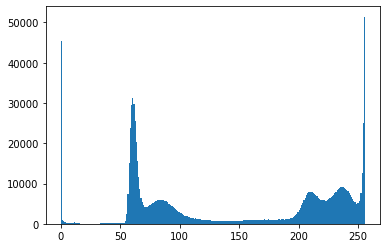

In [3]:
#histogram
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
n, bins, patches=plt.hist(img.ravel(),256,[0,256]); plt.show()

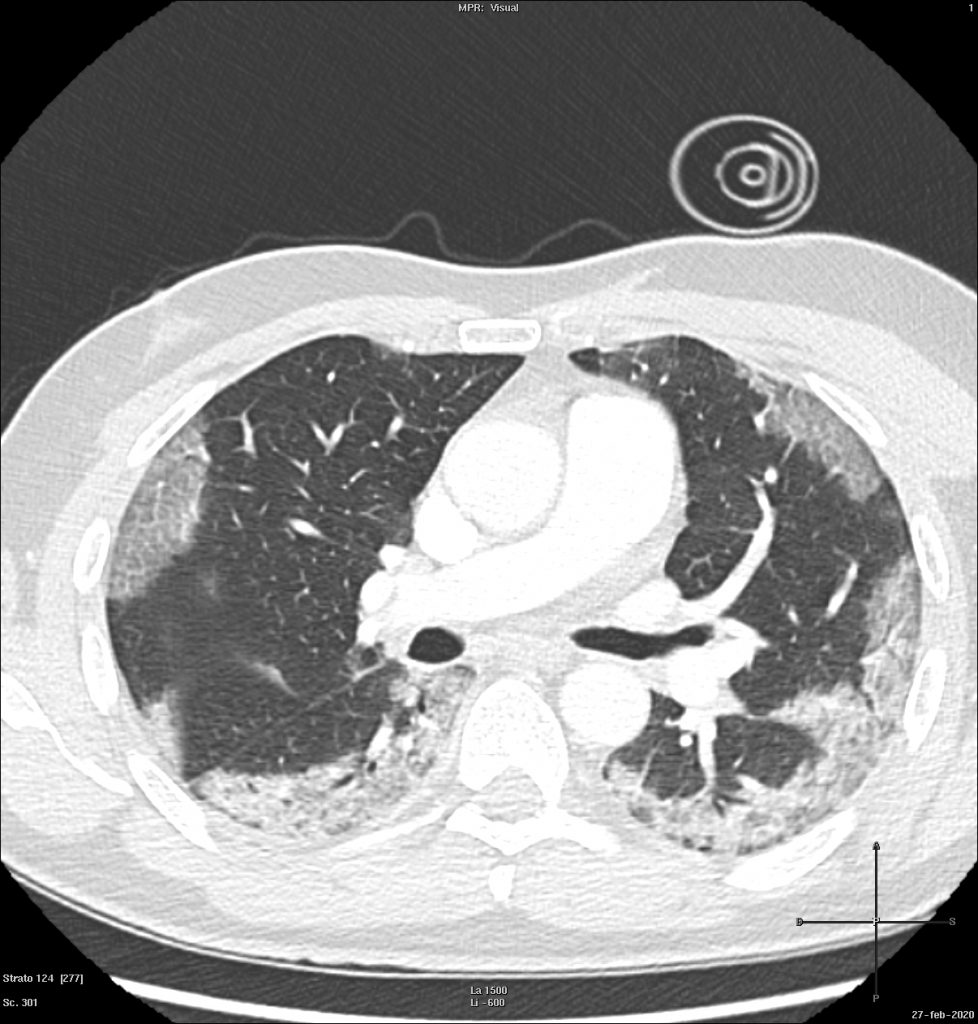

In [ ]:
# import numpy as np
# import cv2
# from google.colab.patches import cv2_imshow


# # create a CLAHE object (Arguments are optional).
# clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
# cl1 = clahe.apply(img)

# cv2_imshow(img)

In [4]:
n=n.reshape(256)
print(img[546][34])


218


In [7]:
from scipy.stats import kurtosis
x=0
from google.colab.patches import cv2_imshow
def HRS(n,t1,t2,name):
  
  imgc=np.full((img.shape[0],img.shape[1]), 0)
  
  values=[]
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      if(img[i][j]>=t1 and img[i][j]<=t2):
        values.append(img[i][j])
        imgc[i][j]=255

  cv2.imwrite('/content/gdrive/My Drive/data/hrs/'+name+'-'+str(t1)+'-'+str(t2)+'.jpg',imgc)

  
  std=np.std(values)
  kurt=kurtosis(values,fisher = False)
  print(x,std,kurt)

  if(std<10 or kurt<1):
    return
  
  p=n[t1:t2]/sum(n[t1:t2])
  N=255
  ohm=[0]*(t2-t1)
  new=[0]*(t2-t1)
  sigma_sq=[0]*(t2-t1)
  for i in range(t2-t1):
    for j in range(0,i):
      ohm[i]+=p[j]
      new[i]+=(j)*p[j]


  for i in range(t2-t1):
    sigma_sq[i]=((new[t2-t1-1]*ohm[i]-new[i])**2)/(ohm[i]*(1-ohm[i]))

  max=0;
  for i in range(len(sigma_sq)):
    if(sigma_sq[i]>max):
      max_i=i
      max=sigma_sq[i]  
  
  th=t1+max_i;
  HRS(n,t1,th,name+'0')
  HRS(n,th,t2,name+'1')
      






    

In [8]:
HRS(n,0,256,'0')

0 83.52452296250961 1.4143550948137464


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars


0 28.10988154379562 4.0987208670877076
0 5.71027027045532 25.741435279173967
0 17.826433963651745 3.5767207455933545
0 6.180833265113764 3.8597166956034097
0 13.334430921560752 3.210615602131892
0 6.0046496877411775 1.9729824521704709
0 9.652127831659955 2.0879098473886404
0 27.037482850619742 4.075578563864762
0 27.037482850619742 4.075578563864762
0 26.354578839445466 4.1254196575796405
0 18.088351714079096 1.884015153452847
0 9.001528959753232 1.7959359937904884
0 9.75623613002108 1.7632700360321676
0 16.62134826686655 1.8548710208419137
0 7.157479173122954 2.1708035609857252
0 9.506324840312107 1.8198380243407282
0 0.46926885188712747 1.541052710037743
0 0.0 0.0


In [ ]:
sigma_sq=sigma_sq[1:]

In [ ]:
import statistics
idx=statistics.mode(sigma_sq)
Th=(idx.mode[0]-1)*256/(256-1)
# print(idx.mode[0])

StatisticsError: ignored

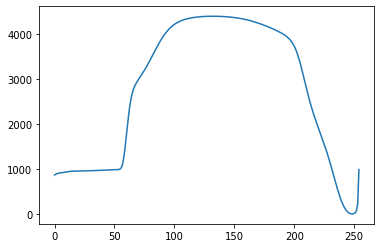

In [ ]:
import matplotlib.pyplot as plt
plt.plot(sigma_sq)

In [ ]:
max=0;
for i in range(len(sigma_sq)):
  if(sigma_sq[i]>max):
    max_i=i
    max=sigma_sq[i]
  
  
print(max,max_i)

4391.429119727505 132
